In [556]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=400
import numpy as np
import random
from math import*

生成样本

In [557]:
scale=0.5
sample_num=500
def r():
    return random.random()*0.5-0.35
x=[]
x.append(np.random.normal(loc=[-1.5+r(),-1.5+r()],scale=scale,size=[sample_num,2]))
x.append(np.random.normal(loc=[1.5+r(),-4+r()],scale=scale,size=[sample_num,2]))
x.append(np.random.normal(loc=[1.5+r(),1.5+r()],scale=scale,size=[sample_num,2]))
x.append(np.random.normal(loc=[-1.5+r(),-4+r()],scale=scale,size=[sample_num,2]))
x.append(np.random.normal(loc=[1.5+r(),-1.5+r()],scale=scale,size=[sample_num,2]))
x.append(np.random.normal(loc=[-1.5+r(),1.5+r()],scale=scale,size=[sample_num,2]))
x_sample=[]
y=[]
for i in range(1000):
    sort=np.random.choice(6)
    x_sample.append(x[sort][np.random.choice(500)])
    if(sort<3):
        y.append(0)
    else:
        y.append(1)
x=np.array(x_sample)
y=np.array(y)


+ 初始化权重，输入维度是3，隐层1维度是4，隐层2维度是4，输出层维度是1，
故各权值向量维度为$omega_1=2\times4,omega_2=4\times4,omega_3=4\times1$
+ 设置参数

In [558]:
layer_1=16
layer_2=16
omega_1=np.matrix(np.random.normal(size=[layer_1,3]))
omega_2=np.matrix(np.random.normal(size=[layer_2,layer_1]))
omega_3=np.matrix(np.random.normal(size=[1,layer_2]))
iteration=1000
learning_rate=1

对每个样本进行训练，依次进行进行前向传播和梯度反传

In [559]:
def train(learning_rate=1):
    global omega_1
    global omega_2
    global omega_3
    last_error=100
    for k in range(iteration):
        error=[]
        for i in range(len(x)):
            x_0=np.matrix([1,x[i][0],x[i][1]]).T
            real_output=np.zeros([4,max(layer_1,layer_2)])
            delta=np.zeros([4,max(layer_1,layer_2)])
            # 第一层输出
            for j in range(layer_1):
                Sigma=omega_1[j]*x_0
                real_output[1][j]=1/(1+exp(-Sigma))
            # 第二层输出
            for j in range(layer_2):
                x_1=np.matrix(real_output[1]).T
                Sigma=omega_2[j]*x_1
                real_output[2][j]=1/(1+exp(-Sigma))
            # 输出层输出
            for j in range(1):
                x_2=np.matrix(real_output[2]).T
                Sigma=omega_3[j]*x_2
                real_output[3][j]=1/(1+exp(-Sigma))

            error.append(abs(real_output[3][0]-y[i]))
            #if(i%1000==0):
                #print((error[-1])*120)
            omega_1=np.array(omega_1)
            omega_2=np.array(omega_2)
            omega_3=np.array(omega_3)
            # 输出层反传
            for j in range(1):
                y_j=real_output[3][j]
                delta[3][j]=y_j*(1-y_j)*(y[i]-y_j)
                for p in range(layer_2):
                    omega_3[j][p]+=learning_rate*delta[3][j]*real_output[2][p]
            # 第二层反传
            for j in range(layer_2):
                y_j=real_output[2][j]
                Sigma=0
                for p in range(1):
                    Sigma+=delta[3][p]*omega_3[p][j]
                delta[2][j]=y_j*(1-y_j)*Sigma
                for p in range(layer_1):
                    omega_2[j][p]+=learning_rate*delta[2][j]*real_output[1][p]
            # 第一层反传
            for j in range(layer_1):
                y_j=real_output[1][j]
                Sigma=0
                for p in range(layer_2):
                    Sigma+=delta[2][p]*omega_2[p][j]
                delta[1][j]=y_j*(1-y_j)*Sigma
                for p in range(3):
                    omega_1[j][p]+=learning_rate*delta[1][j]*x_0[p]
            omega_1=np.matrix(omega_1)
            omega_2=np.matrix(omega_2)
            omega_3=np.matrix(omega_3)
        error=np.mean(error)
        print(error)
        '''if((last_error-error)/error<0.002):
            learning_rate/=2
        last_error=error'''
        if(k%10==0):
            plot_regions(x,y)

预测

In [560]:
def predict(x_1,x_2):
    x_0=np.matrix([1,x_1,x_2]).T
    real_output=np.zeros([3,max(layer_1,layer_2)])
    delta=np.zeros([3,max(layer_1,layer_2)])
    # 第一层输出
    for j in range(layer_1):
        Sigma=omega_1[j]*x_0
        real_output[0][j]=1/(1+exp(-Sigma))
    # 第二层输出
    for j in range(layer_2):
        x_1=np.matrix(real_output[0]).T
        Sigma=omega_2[j]*x_1
        real_output[1][j]=1/(1+exp(-Sigma))
    # 输出层输出
    for j in range(1):
        x_2=np.matrix(real_output[1]).T
        Sigma=omega_3[j]*x_2
        real_output[2][j]=1/(1+exp(-Sigma))
    if(real_output[2][j]<0.5):
        return 0
    else:
        return 1

对列表分类

In [561]:
def classify(x):
    outcome=[]
    for i in range(len(x)):
        #print(x[i][0],x[i][1])
        res=predict(x[i][0],x[i][1])
        if(res):
            outcome.append(1)
        else:
            outcome.append(0)
    return np.array(outcome)

In [562]:
def plot_regions(x, y, resolution=0.05):
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['r', 'g', 'b', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    '''x1_min, x1_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    x2_min, x2_max = x[:, 2].min() - 1, x[:, 2].max() + 1'''
    x1_min, x1_max =-4,4
    x2_min, x2_max =-6,4
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classify(np.array([xx1.ravel(), xx2.ravel()]).T)
    print(z.shape)
    z = z.reshape(xx1.shape)
    print(z.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
 
    for idx, cc in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cc, 0],
                    y=x[y == cc, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cc)
    plt.show()

0.26393402271569055


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(32000,)
(200, 160)


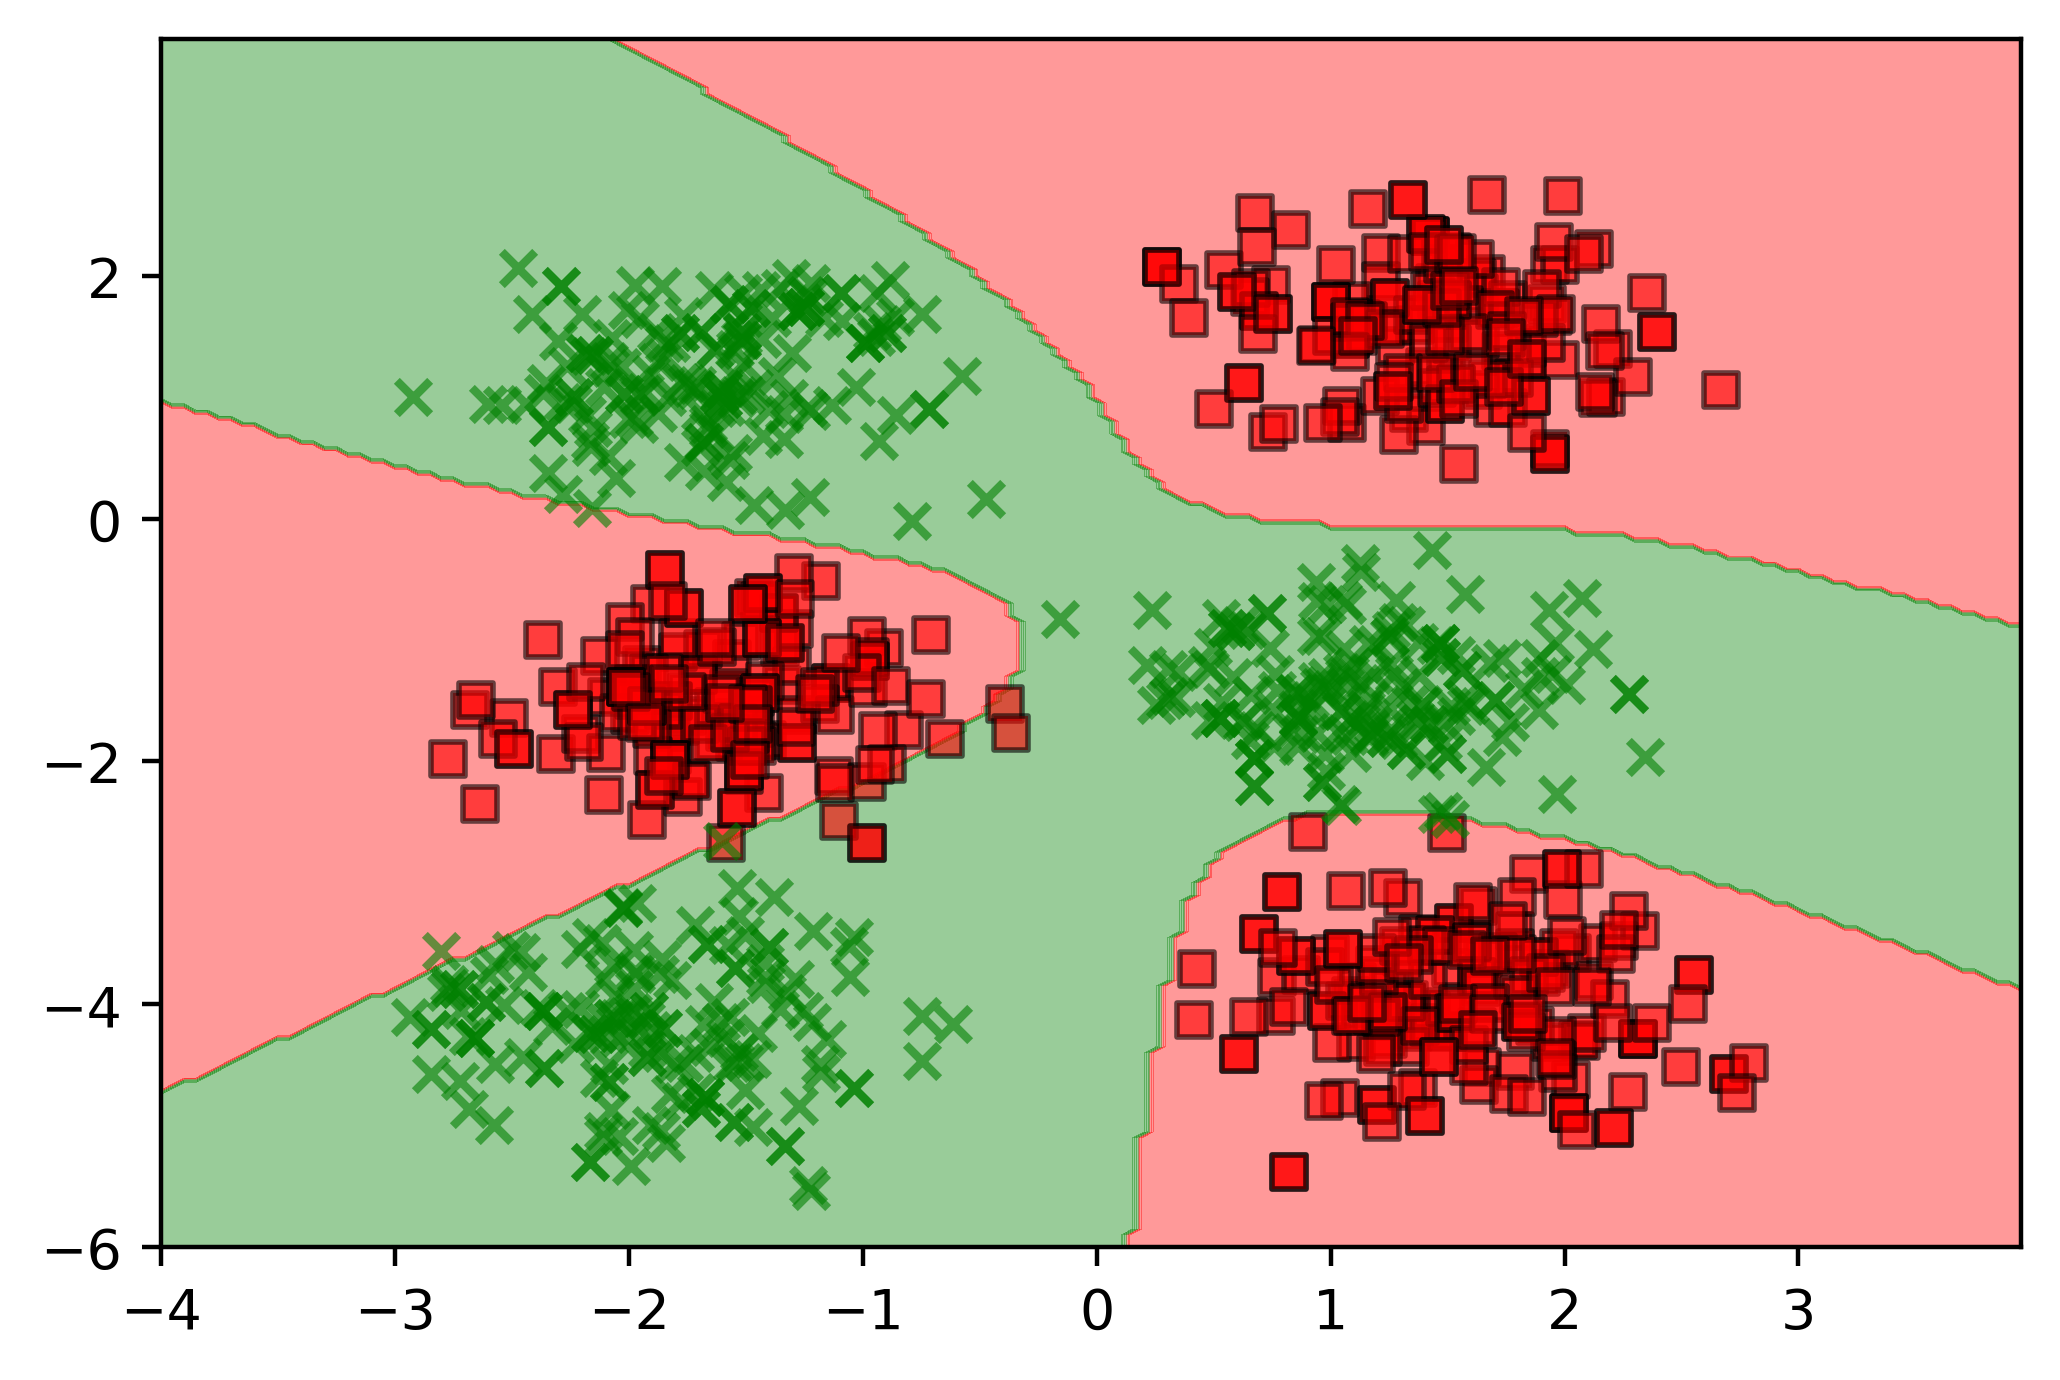

0.0737630476720694
0.05720539261227845
0.044683556309735833
0.04103697240849427
0.03983136010926584
0.04005977275043438
0.023332469016272697
0.029361213520181156
0.026629555735405888
0.027650251017159854


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(32000,)
(200, 160)


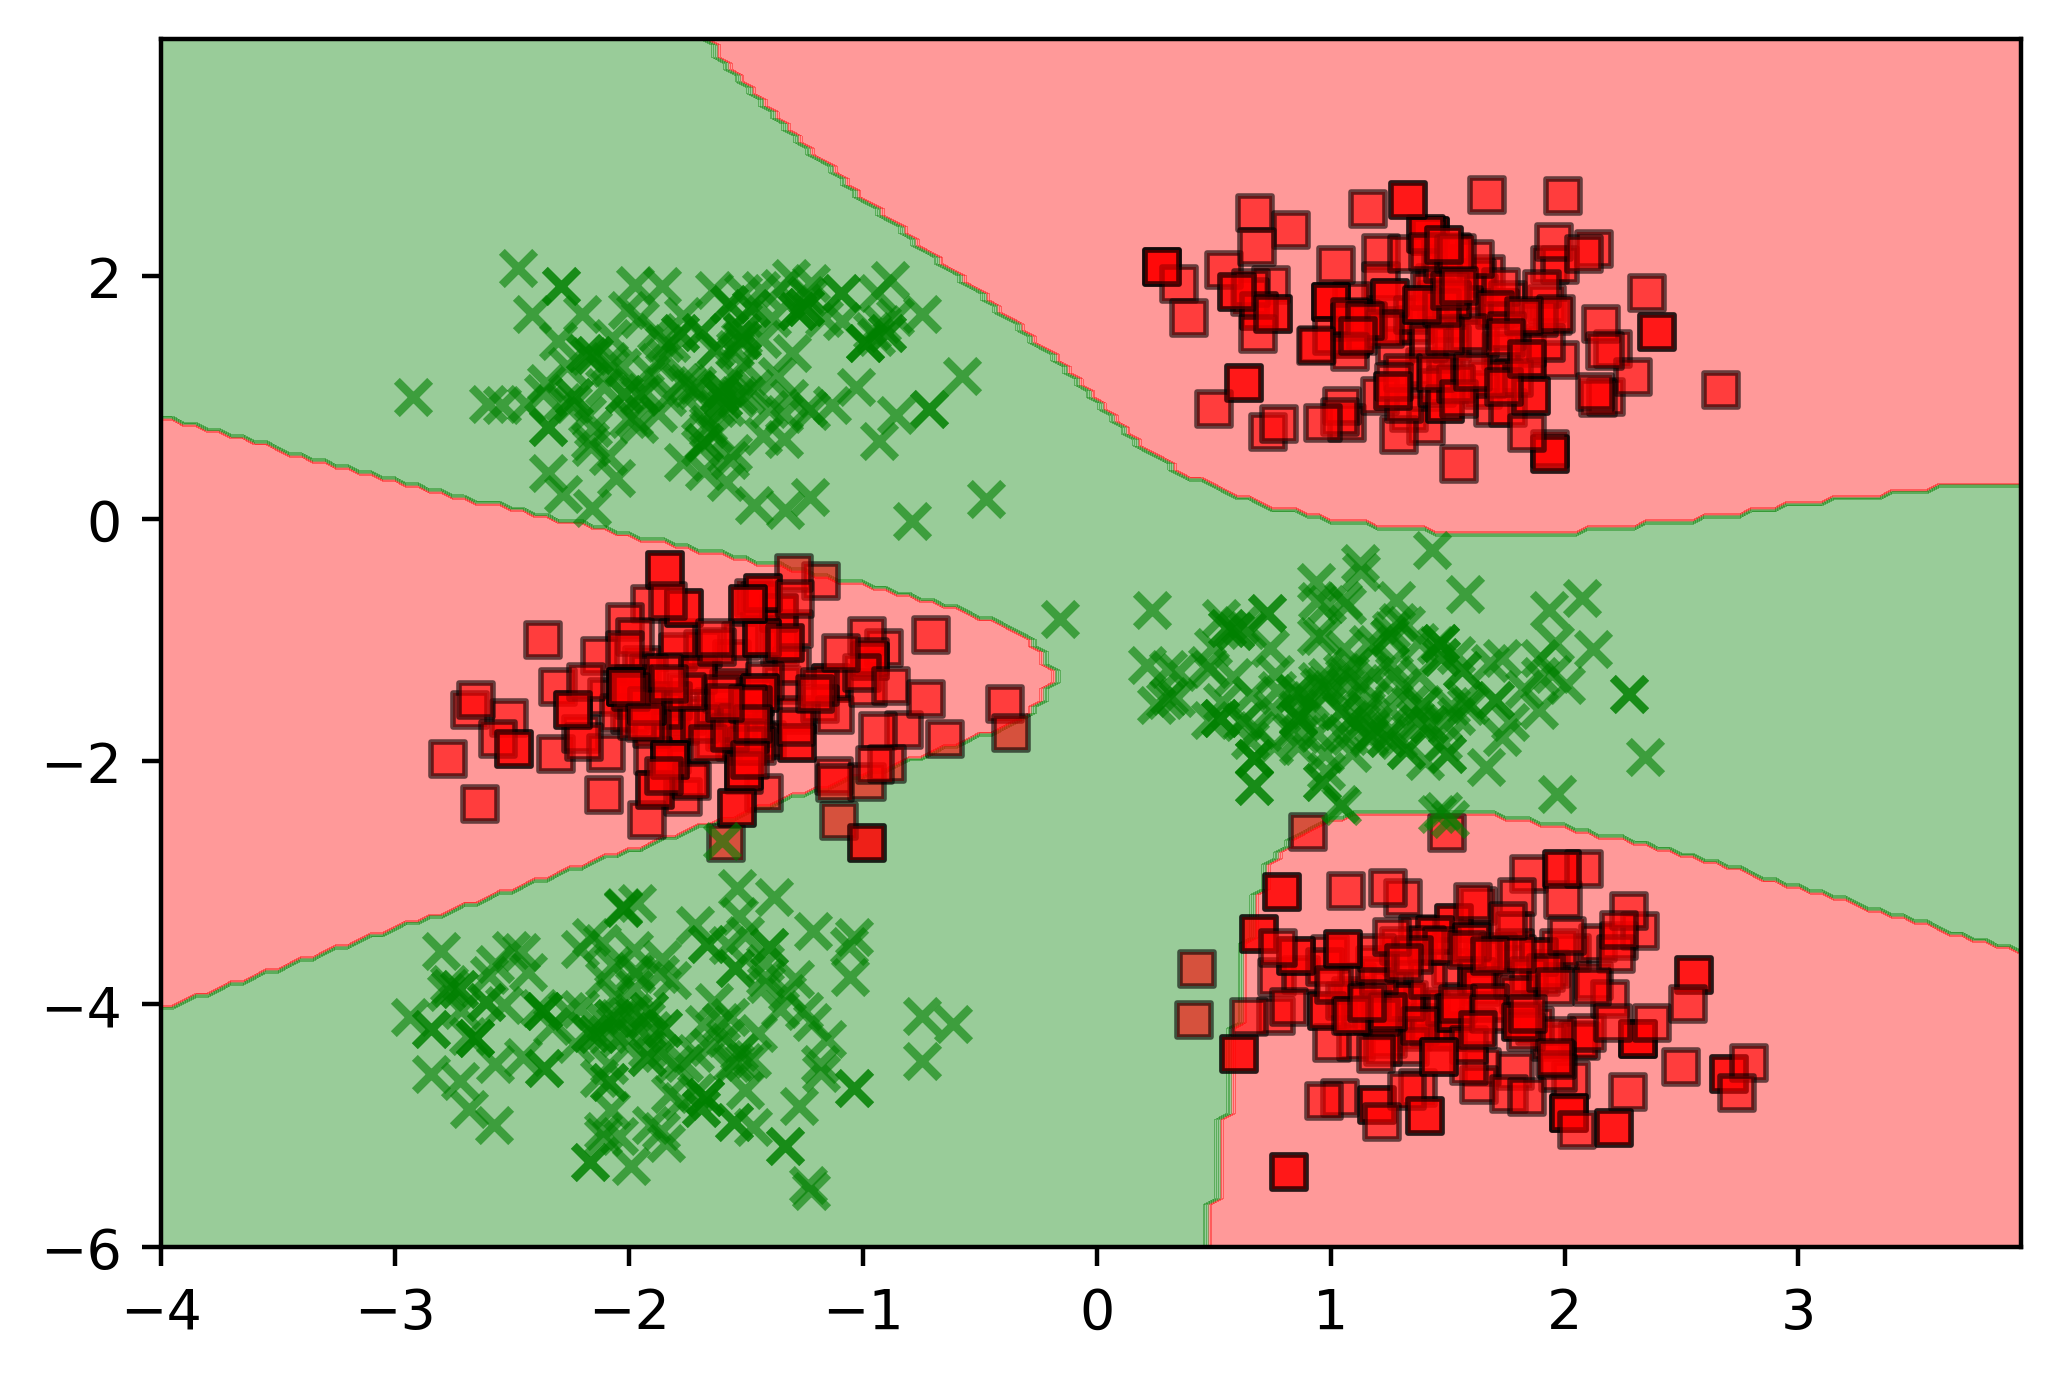

0.029912387683614088
0.02284675990554294
0.024980218674597418
0.021367064462136747
0.026016403636974664
0.03304022598631531
0.024976497539072568
0.020533836721589337
0.020920503649381417
0.020656960160517702


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(32000,)
(200, 160)


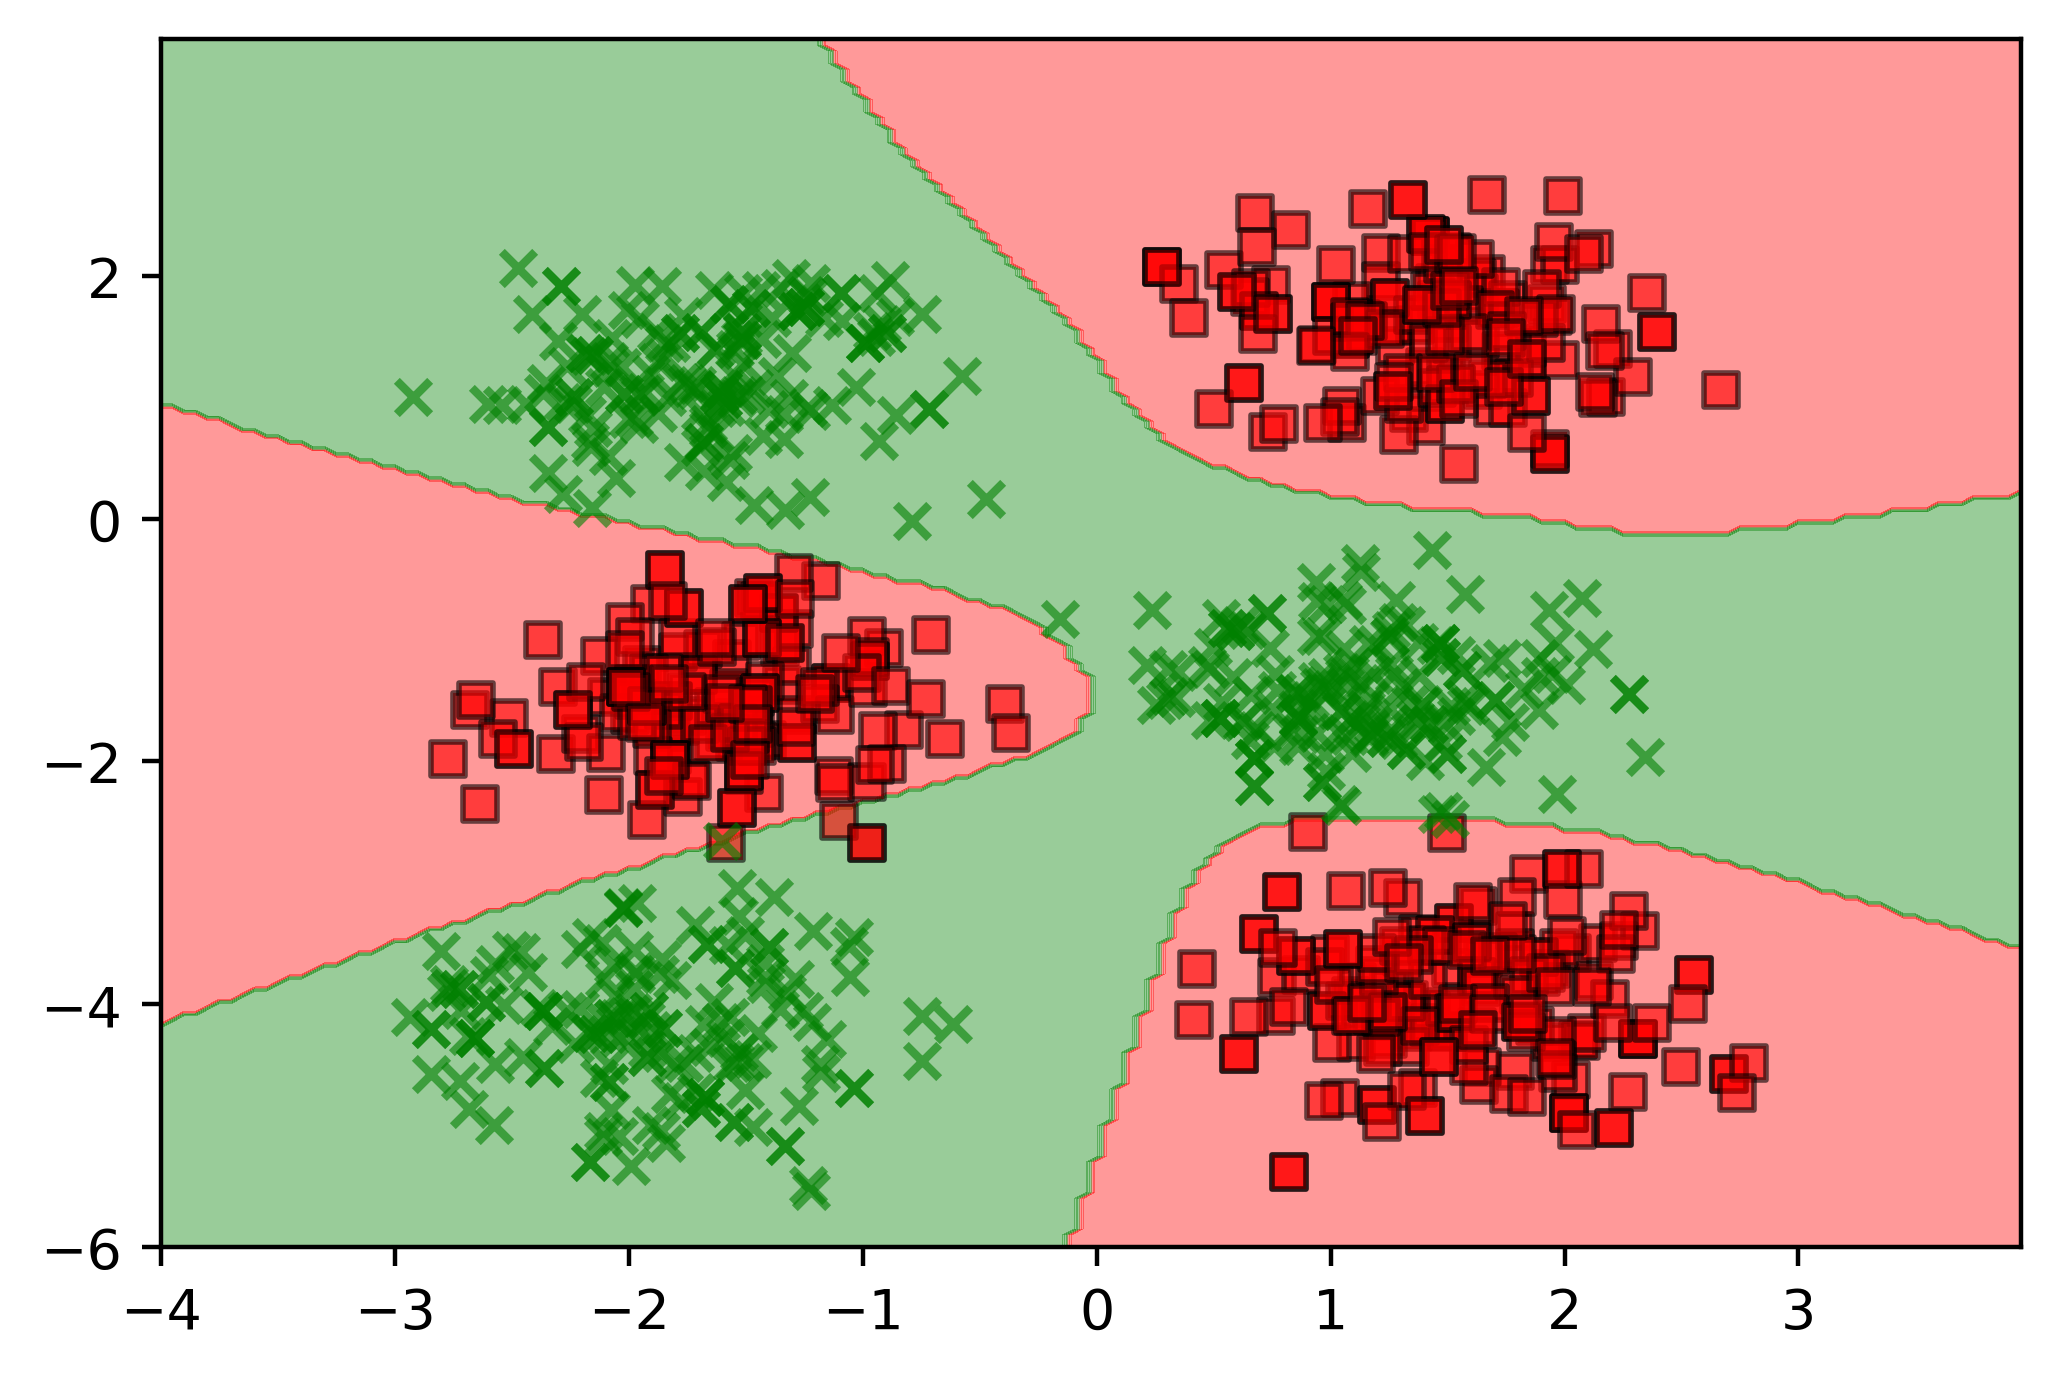

0.017518370828789927
0.015834008253332133
0.01929305805335376
0.022216836038253116
0.01785496963622169
0.019247098017102848
0.018881739931671186
0.026432725610556648


KeyboardInterrupt: 

In [563]:
train()